In [166]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

WHEEL_L = 0.0871333 
TICKS_TO_M = 1.4753882780592384e-6

In [175]:
with open("PF_test__12.txt", "r") as file:
    raw_data = file.read().strip().split("Mode")[1:-2]

ndata = len(raw_data)
columns = list(map(lambda x: (x.split(" = ")[0]), raw_data[0].strip().split("\n")[1:]))
columns = ["Mode", *columns]

data_mode = ndata*[""]
data_np = np.zeros((len(columns)-1, ndata))

for i in range(ndata):
    spi_in_str = False
    current = raw_data[i]
    if ("SPI" in raw_data[i]):
        spi_in_str = True
        current = re.sub("SPI.*", "", raw_data[i], flags=re.S)
    if ("query" in raw_data[i]):
        current = re.sub("query.*\n", "", current)   
    if ("\na = " in raw_data[i]):
        current = re.sub("\na = .*", "\n", current, flags=re.S)
    if ("\nstate is" in raw_data[i]):
        current = re.sub("\nstate is.*", "\n", current, flags=re.S) 
    if ("\nstate is" in raw_data[i]):
        current = re.sub("\nstate is.*", "\n", current, flags=re.S) 
    try:  
        splitted_data = current.strip().split("\n")
        mode = splitted_data[0].strip()
        data_mode[i] = mode
        data_np[:,i] = list(map(lambda x: float(x.split(" = ")[-1]), splitted_data[1:]))

    except:
        print("Error parsing sample number ", i, "\n")
        print(raw_data[i])
        print(current)
        break

data = pd.DataFrame(data_np.T, columns=columns[1:])
data.insert(0,"time",data["dt"],False)
data.insert(0,"Mode",data_mode,False)

data

,Mode,time,dt,xpos,ypos,thetapos,kif,tickl,tickr
0,idle,2.30601,2.30601,0.0000,0.000000,0.00000,0.0,0.0,0.0
1,idle,2.30701,2.30701,0.0000,0.000000,0.00000,0.0,0.0,0.0
2,idle,41.97300,41.97300,0.0000,0.000000,0.00000,0.0,0.0,0.0
3,idle,41.97400,41.97400,0.0000,0.000000,0.00000,0.0,0.0,0.0
4,idle,41.97500,41.97500,0.0000,0.000000,0.00000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
126180,idle,168.15100,168.15100,2.5241,-0.622185,2.28804,0.0,0.0,0.0
126181,idle,168.15200,168.15200,2.5241,-0.622185,2.28804,0.0,0.0,0.0
126182,idle,168.15300,168.15300,2.5241,-0.622185,2.28804,0.0,0.0,0.0
126183,idle,168.15400,168.15400,2.5241,-0.622185,2.28804,0.0,0.0,0.0


In [176]:
mask = np.logical_and(data["time"] >=0, data["time"] <= 1000)
# print(data["Mode"])
# print(mask)
# mask = np.logical_and(mask, data["time"] <=100)
t0 = data["time"][mask].iloc[0]
# x0 = data["xpos"][mask].iloc[0]
# y0 = data["ypos"][mask].iloc[0]

data = data[mask]
data.loc[:,"time"] = data["time"].iloc[:] - t0
# data.loc[:,"xpos"] = data["xpos"] - x0
# data.loc[:,"ypos"] = data["ypos"] - y0
# mask = np.logical_and(mask, data["time"] <= 0.4)
data = data[mask]
data

,Mode,time,dt,xpos,ypos,thetapos,kif,tickl,tickr
0,idle,0.00000,2.30601,0.0000,0.000000,0.00000,0.0,0.0,0.0
1,idle,0.00100,2.30701,0.0000,0.000000,0.00000,0.0,0.0,0.0
2,idle,39.66699,41.97300,0.0000,0.000000,0.00000,0.0,0.0,0.0
3,idle,39.66799,41.97400,0.0000,0.000000,0.00000,0.0,0.0,0.0
4,idle,39.66899,41.97500,0.0000,0.000000,0.00000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
126180,idle,165.84499,168.15100,2.5241,-0.622185,2.28804,0.0,0.0,0.0
126181,idle,165.84599,168.15200,2.5241,-0.622185,2.28804,0.0,0.0,0.0
126182,idle,165.84699,168.15300,2.5241,-0.622185,2.28804,0.0,0.0,0.0
126183,idle,165.84799,168.15400,2.5241,-0.622185,2.28804,0.0,0.0,0.0


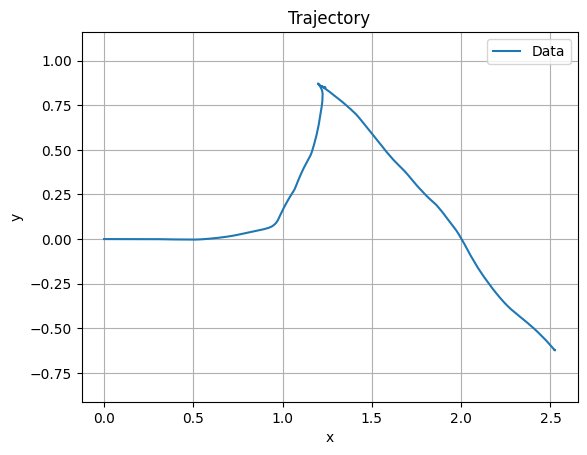

In [177]:
xcheckpoint = [0.0,0.4,0.8,0.4,0.0]
ycheckpoint = [1.5,1.7,1.5,1.3,1.5]
plt.title("Trajectory")
plt.plot(data["xpos"], data["ypos"], label="Data")
# plt.plot(xcheckpoint, ycheckpoint, 'x', label="Checkpoints")
plt.plot()
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.axis("equal")
plt.grid()
# plt.xlim(0.6,0.8)
plt.show()

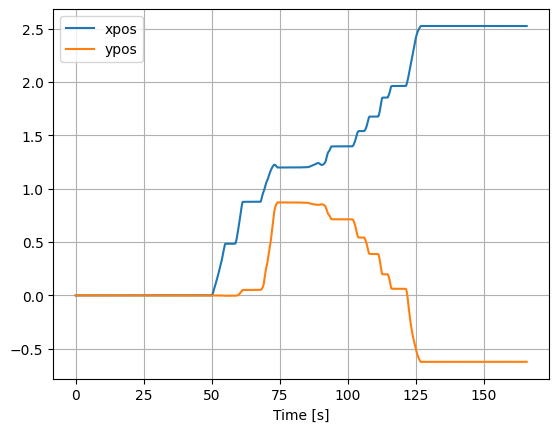

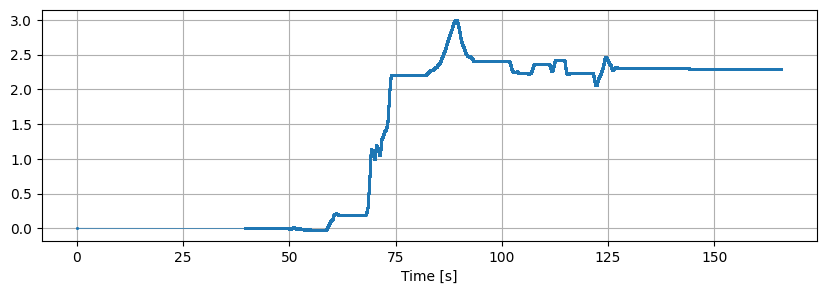

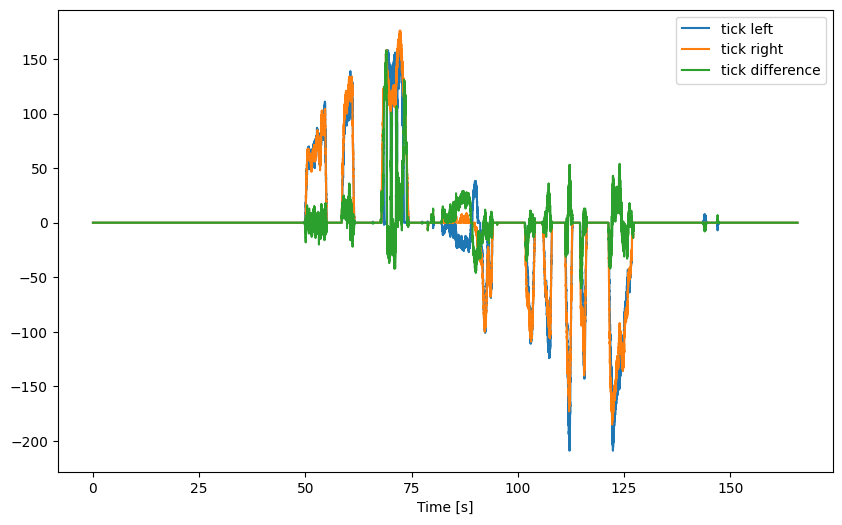

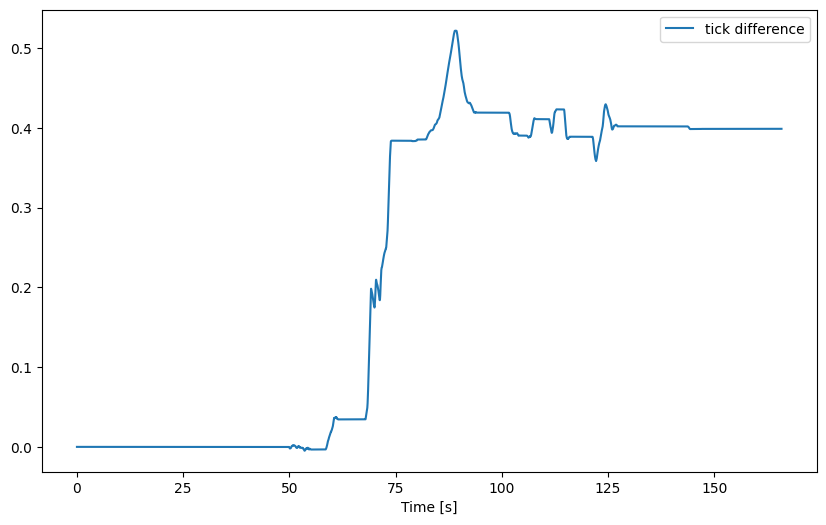

In [170]:
plt.plot(data["time"], data["xpos"], label="xpos")
plt.plot(data["time"], data["ypos"], label="ypos")
plt.xlabel("Time [s]")
# plt.xlim(0,25)
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10,3))
plt.plot(data["time"], data["thetapos"], '-o', markersize=1, linewidth=0.5)
plt.xlabel("Time [s]")
# plt.xlim(69,70)
plt.grid()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(data["time"], data["tickl"], label="tick left")
plt.plot(data["time"], data["tickr"], label="tick right")
plt.plot(data["time"], data["tickr"] - data["tickl"], label="tick difference")
plt.xlabel("Time [s]")
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
# plt.plot(data["time"], np.cumsum(data["tickl"]), label="tick left")
# plt.plot(data["time"], np.cumsum(data["tickr"]), label="tick right")
plt.plot(data["time"], np.cumsum(data["tickr"] - data["tickl"])*TICKS_TO_M, label="tick difference")
plt.xlabel("Time [s]")
plt.legend()
plt.show()

# Compute expected trajectory from tick data

In [146]:
WHEEL_L = 0.0871333 
TICKS_TO_M = 1.4753882780592384e-6

xpos = np.zeros(len(data["time"]))
ypos = np.zeros(len(data["time"]))
thetapos = np.zeros(len(data["time"]))
# theta_filt = np.zeros(len(data["time"]))

xpos[0] = data["xpos"][0]
ypos[0] = data["ypos"][0]
thetapos[0] = data["thetapos"][0]
# theta_filt[0] = data["thetapos"][0]

for i in range(1,len(data["time"])):

    dt = data["time"][i] - data["time"][i-1]
    deltar = data["tickr"][i]*TICKS_TO_M
    deltal = data["tickl"][i]*TICKS_TO_M
    delta_fwd = 0.5*(deltar+deltal)
    delta_theta = 0.5*(deltar-deltal)/WHEEL_L

    xpos[i] = xpos[i-1] + delta_fwd * np.cos(thetapos[i-1] + delta_theta/2)
    ypos[i] = ypos[i-1] + delta_fwd * np.sin(thetapos[i-1] + delta_theta/2)
    thetapos[i] = thetapos[i-1] + delta_theta


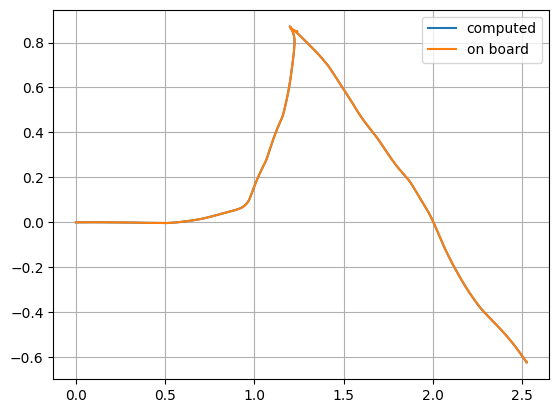

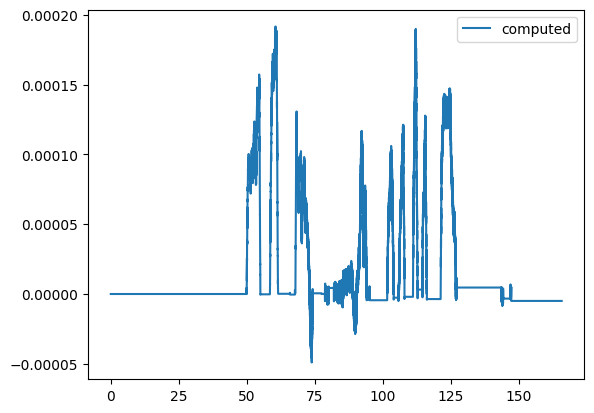

In [147]:
plt.plot(xpos, ypos, label="computed")
plt.plot(data["xpos"], data["ypos"], label="on board")
plt.legend()
plt.grid()
plt.show()

plt.plot(data["time"], xpos - data["xpos"], label = "computed")
# plt.plot(data["time"], data["xpos"], label="on board")
plt.legend()
plt.show()

# Does filtering the ticks solve the problem ?

In [140]:
wc = np.pi/10

In [141]:
WHEEL_L = 0.0871333 
TICKS_TO_M = 1.4753882780592384e-6

xpos = np.zeros(len(data["time"]))
ypos = np.zeros(len(data["time"]))
thetapos = np.zeros(len(data["time"]))
deltarf = np.zeros(len(data["time"]))
deltalf = np.zeros(len(data["time"]))

xpos[0] = data["xpos"][0]
ypos[0] = data["ypos"][0]
thetapos[0] = data["thetapos"][0]
deltarf[0] = 0
deltalf[0] = 0

for i in range(1,len(data["time"])):

    dt = data["time"][i] - data["time"][i-1]
    a = np.exp(-wc*dt) # Discrete filter constant
    if (i == 1):
        print(a)
    deltar = data["tickr"][i]*TICKS_TO_M
    deltal = data["tickl"][i]*TICKS_TO_M

    deltarf[i] = a*deltarf[i-1] + (1-a)*deltar
    deltalf[i] = a*deltalf[i-1] + (1-a)*deltal
    delta_fwd = 0.5*(deltarf[i]+deltalf[i])
    delta_theta = 0.5*(deltarf[i]-deltalf[i])/WHEEL_L

    xpos[i] = xpos[i-1] + delta_fwd * np.cos(thetapos[i-1] + delta_theta/2)
    ypos[i] = ypos[i-1] + delta_fwd * np.sin(thetapos[i-1] + delta_theta/2)
    thetapos[i] = thetapos[i-1] + delta_theta


0.9996858900774958


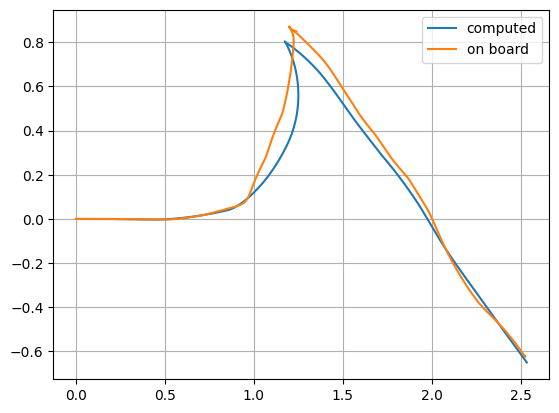

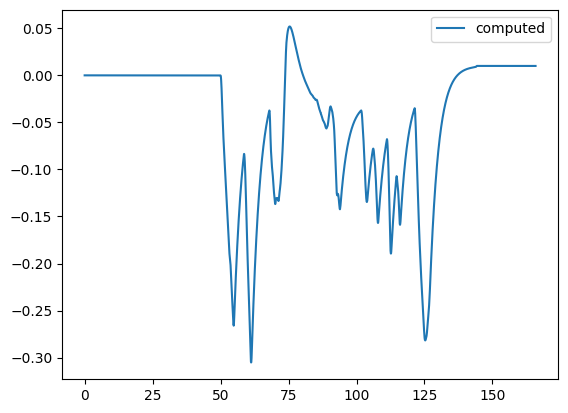

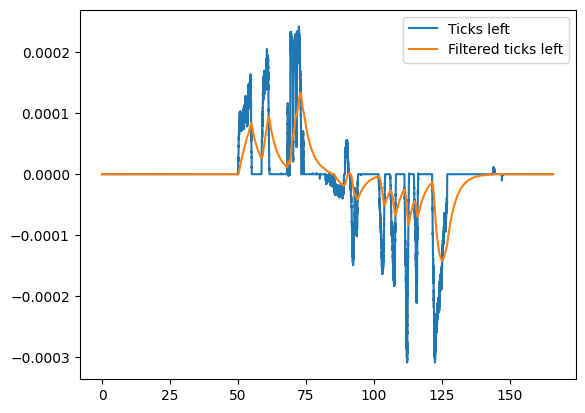

In [142]:
plt.plot(xpos, ypos, label="computed")
plt.plot(data["xpos"], data["ypos"], label="on board")
plt.legend()
plt.grid()
plt.show()

plt.plot(data["time"], xpos - data["xpos"], label = "computed")
# plt.plot(data["time"], data["xpos"], label="on board")
plt.legend()
plt.show()

plt.plot(data["time"], data["tickl"]*TICKS_TO_M, label="Ticks left")
plt.plot(data["time"], deltalf, label="Filtered ticks left")
plt.legend()
plt.show()